# Day 10
## Puzzle 1

In [61]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [62]:
# input_file = 'input_1.txt'
# input_file = 'test_input_1.txt'
input_file = 'test_input_2.txt'

Read the topological map.

In [63]:
with open(file=input_file, mode="r") as file:
    topographic_map = []

    for line in file:
        topographic_map.append([int(character) for character in line.strip()])

    topographic_map_matrix = np.matrix(topographic_map)

If the height difference between two adjacent (right, left, down, up) pairs of coordinates is 1, add an edge (path) between the pairs.

In [64]:
m, n = topographic_map_matrix.shape
edges = []
labels = {}

for i in range(m):
    for j in range(n):
        current_node_value = topographic_map_matrix[i, j]
        labels[(i, j)] = current_node_value
        
        if j + 1 < m:
            current_right_node_value = topographic_map_matrix[i, j + 1]

            if current_right_node_value - current_node_value == 1:
                edges.append(((i, j), (i, j + 1)))
            
        if j - 1 >= 0:
            current_left_node_value = topographic_map_matrix[i, j - 1]

            if current_left_node_value - current_node_value == 1:
                edges.append(((i, j), (i, j - 1)))

        if i + 1 < n:
            current_bottom_node_value = topographic_map_matrix[i + 1, j]

            if current_bottom_node_value - current_node_value == 1:
                edges.append(((i, j), (i + 1, j)))

        if i - 1 >= 0:
            current_top_node_value = topographic_map_matrix[i - 1, j]

            if current_top_node_value - current_node_value == 1:
                edges.append(((i, j), (i - 1, j)))

In [65]:
edges[:20]

[((0, 0), (0, 1)),
 ((0, 2), (0, 3)),
 ((0, 2), (1, 2)),
 ((0, 3), (1, 3)),
 ((0, 4), (0, 5)),
 ((0, 4), (0, 3)),
 ((0, 4), (1, 4)),
 ((0, 5), (0, 6)),
 ((0, 6), (0, 7)),
 ((0, 7), (1, 7)),
 ((1, 0), (1, 1)),
 ((1, 0), (2, 0)),
 ((1, 0), (0, 0)),
 ((1, 1), (0, 1)),
 ((1, 2), (1, 3)),
 ((1, 3), (2, 3)),
 ((1, 4), (1, 3)),
 ((1, 5), (2, 5)),
 ((1, 6), (1, 5)),
 ((1, 7), (2, 7))]

Create a directed graph from the edges.

In [66]:
D = nx.DiGraph()
D.add_edges_from(edges)

Plot the graph (only for test input).

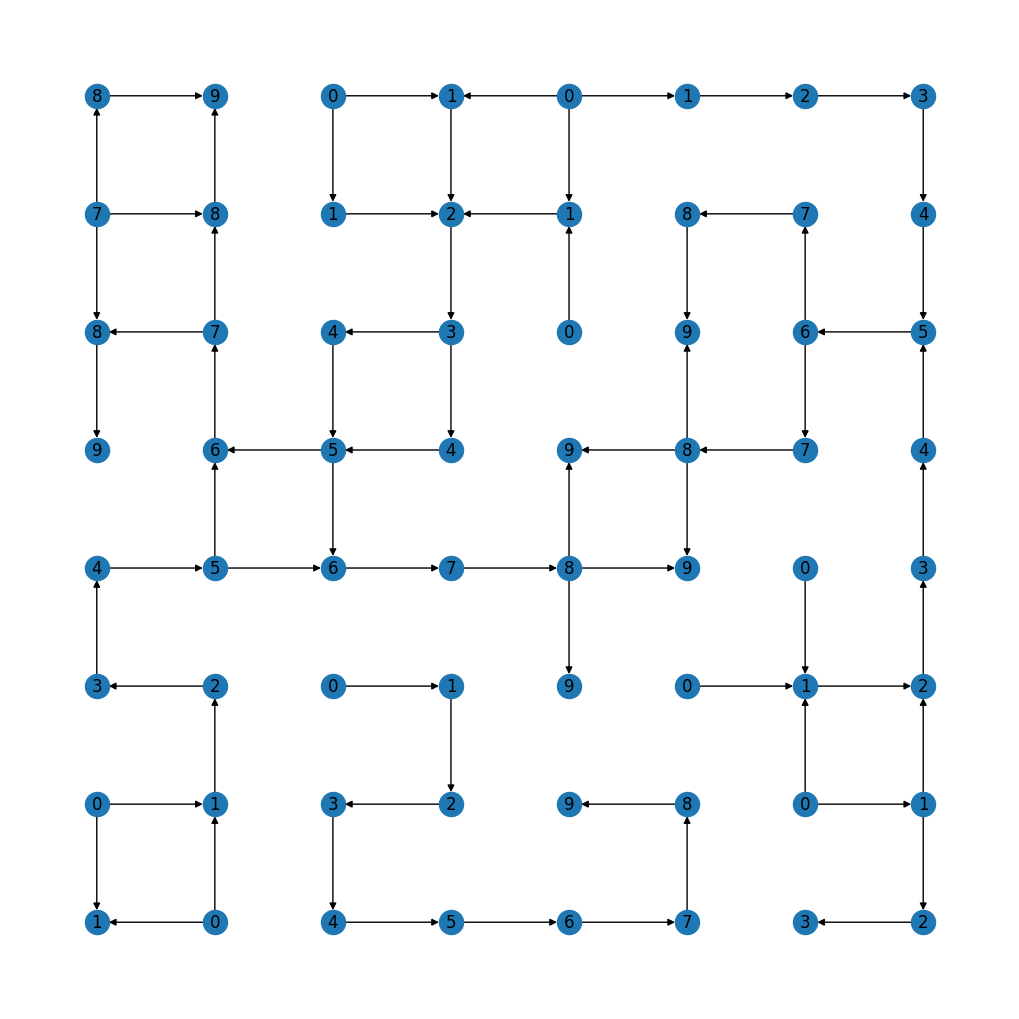

In [67]:
if input_file.startswith('test'):
    plt.figure(figsize=(10, 10))
    positions = {node: (node[1], -node[0]) for node in D.nodes}
    nx.draw(D, with_labels=True, pos=positions, labels=labels)

Extract the adjacency matrix of the graph.

In [68]:
A = nx.linalg.adjacency_matrix(D).toarray()

In [69]:
A

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

The element $t_{i,j}$ of $T=A^9$ shows us the number of length 9 walks between node $i$ and node $j$. Taking the sum of all the elements of $T$ will actually give us the sum of the trailhead ratings (part 2). Since we now only want to know the sum of the trailhead scores, we only count the number of elements of $T$ having $t_{i,j} > 0$.

In [70]:
A_trailhead_matrix = np.linalg.matrix_power(A, 9)

In [71]:
int((A_trailhead_matrix > 0).sum())

36

## Puzzle 2

In [72]:
int(A_trailhead_matrix.sum())

81